In [1]:
import pandas as pd
import numpy as np 
import mysql.connector
import pandas.io.sql as psql
# !pip install mysql-connector-python
# !pip install pandasql
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
from datetime import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# https://towardsdatascience.com/how-to-use-sql-in-pandas-62d8a0f6341
pysqldf = lambda q: sqldf(q, globals())

In [3]:
from mysql.connector import (connection)

cnx = connection.MySQLConnection(user='root', password='aA19960803/',
                                 host='127.0.0.1',
                                 database='database_project')
# cnx.close()
mycursor =cnx.cursor()
# mycursor.execute("select * from gdp;")
gdp_raw_query = """select * from gdp 
                    where country_name = 'Brazil'or country_name = 'China'
                    or country_name = 'Least developed countries: UN classification'
                    or country_name = 'Switzerland'or country_name = 'Germany'
                    or country_name = 'Spain'or country_name = 'France'
                    or country_name = 'United Kingdom'or country_name = 'High income'
                    or country_name like '%Egypt%'or country_name = 'India'or country_name = 'Japan'
                    or country_name ='Italy'or country_name = 'Thailand'or country_name = 'Ukraine'
                    or country_name like '%Russia%'or country_name = 'Upper middle income'
                    or country_name = 'Vietnam'or country_name = 'World'or country_name = 'United States'
                    or country_name like '%Korea%'or country_name = 'Australia'or country_name = 'Argentina'
                    or country_name = 'Mexico'or country_name = 'New Zealand'or country_name =  'Israel'
                    or country_name = 'Iceland'or country_name = 'Colombia'or country_name = 'South Africa'
                    or country_name = 'Indonesia'or country_name = 'Singapore'or country_name = 'Nepal'
                    or country_name = 'Bulgaria'or country_name = 'Sri Lanka'or country_name = 'Philippines'
                    or country_name = 'Morocco'or country_name = 'Saudi Arabia'
                    or country_name = 'Chile'order by country_name;"""
inflation_raw_query = """select * from inflation where country_name = 'Brazil'or country_name = 'China'
                        or country_name = 'Least developed countries: UN classification'
                        or country_name = 'Switzerland'or country_name = 'Germany'or country_name = 'Spain'
                        or country_name = 'France'or country_name = 'United Kingdom'or country_name = 'High income'
                        or country_name like '%Egypt%'or country_name = 'India'or country_name = 'Japan'
                        or country_name ='Italy'or country_name = 'Thailand'or country_name = 'Ukraine'
                        or country_name like '%Russia%'or country_name = 'Upper middle income'
                        or country_name = 'Vietnam'or country_name = 'World'or country_name = 'United States'
                        or country_name like '%Korea%'or country_name = 'Australia'or country_name = 'Argentina'
                        or country_name = 'Mexico'or country_name = 'New Zealand'
                        or country_name =  'Israel'or country_name = 'Iceland'or country_name = 'Colombia'
                        or country_name = 'South Africa'or country_name = 'Indonesia'or country_name = 'Singapore'
                        or country_name = 'Nepal'or country_name = 'Bulgaria'or country_name = 'Sri Lanka'
                        or country_name = 'Philippines'or country_name = 'Morocco'or country_name = 'Saudi Arabia'
                        or country_name = 'Chile'order by country_name;"""
oil_rents_raw_query = """select * from oil_rents where country_name = 'Brazil'
                        or country_name = 'China'or country_name = 'Least developed countries: UN classification'
                        or country_name = 'Switzerland'or country_name = 'Germany'or country_name = 'Spain'
                        or country_name = 'France'or country_name = 'United Kingdom'
                        or country_name = 'High income'or country_name like '%Egypt%'
                        or country_name = 'India'or country_name = 'Japan'or country_name ='Italy'
                        or country_name = 'Thailand'or country_name = 'Ukraine'
                        or country_name like '%Russia%'or country_name = 'Upper middle income'
                        or country_name = 'Vietnam'or country_name = 'World'or country_name = 'United States'
                        or country_name like '%Korea%'or country_name = 'Australia'
                        or country_name = 'Argentina'or country_name = 'Mexico'
                        or country_name = 'New Zealand'or country_name =  'Israel'or country_name = 'Iceland'
                        or country_name = 'Colombia'or country_name = 'South Africa'or country_name = 'Indonesia'
                        or country_name = 'Singapore'or country_name = 'Nepal'or country_name = 'Bulgaria'
                        or country_name = 'Sri Lanka'or country_name = 'Philippines'or country_name = 'Morocco'
                        or country_name = 'Saudi Arabia'or country_name = 'Chile'order by country_name;"""
tourist_expenditure_query = "select * from database_project.tourist_inbound_exp"
tourist_inbound_query = "select * from database_project.tourist_inbound"
tourist_outbound_query = "select * from database_project.tourist_outbound"
covid_query = """SELECT iso_code,location, date, total_cases_per_million, stringency_index, 
                total_vaccinations, people_fully_vaccinated 
                FROM database_project.covid;"""

gdp_raw = pd.read_sql(gdp_raw_query, cnx)
inflation_raw = pd.read_sql(inflation_raw_query, cnx)
oil_rents_raw = pd.read_sql(oil_rents_raw_query,cnx)
tourist_expenditure_raw = pd.read_sql(tourist_expenditure_query, cnx)
tourist_inbound_raw = pd.read_sql(tourist_inbound_query, cnx)
tourist_outbound_raw = pd.read_sql(tourist_outbound_query, cnx)
covid_raw = pd.read_sql(covid_query,cnx)

# Data Cleaning

In [4]:
covid_raw.dtypes

iso_code                   object
location                   object
date                       object
total_cases_per_million    object
stringency_index           object
total_vaccinations         object
people_fully_vaccinated    object
dtype: object

In [5]:
covid_raw["total_cases_per_million"] = pd.to_numeric(covid_raw["total_cases_per_million"])
covid_raw["stringency_index"] = pd.to_numeric(covid_raw["stringency_index"])
covid_raw["total_vaccinations"] = pd.to_numeric(covid_raw["total_vaccinations"])
covid_raw["people_fully_vaccinated"] = pd.to_numeric(covid_raw["people_fully_vaccinated"])
covid_raw['date'] = pd.to_datetime(covid_raw['date'], infer_datetime_format=True).dt.strftime("%Y-%m-%d")
covid_raw.iso_code.unique()

array(['ARG', 'AUS', 'BRA', 'BGR', 'CHL', 'CHN', 'COL', 'EGY', 'FRA',
       'DEU', 'ISL', 'IND', 'IDN', 'ISR', 'ITA', 'JPN', 'MEX', 'MAR',
       'NPL', 'NZL', 'PHL', 'RUS', 'SAU', 'SGP', 'ZAF', 'KOR', 'ESP',
       'LKA', 'CHE', 'THA', 'UKR', 'USA'], dtype=object)

In [6]:
covid_raw.location.unique()

array(['Argentina', 'Australia', 'Brazil', 'Bulgaria', 'Chile', 'China',
       'Colombia', 'Egypt', 'France', 'Germany', 'Iceland', 'India',
       'Indonesia', 'Israel', 'Italy', 'Japan', 'Mexico', 'Morocco',
       'Nepal', 'New Zealand', 'Philippines', 'Russia', 'Saudi Arabia',
       'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',
       'Switzerland', 'Thailand', 'Ukraine', 'United States'],
      dtype=object)

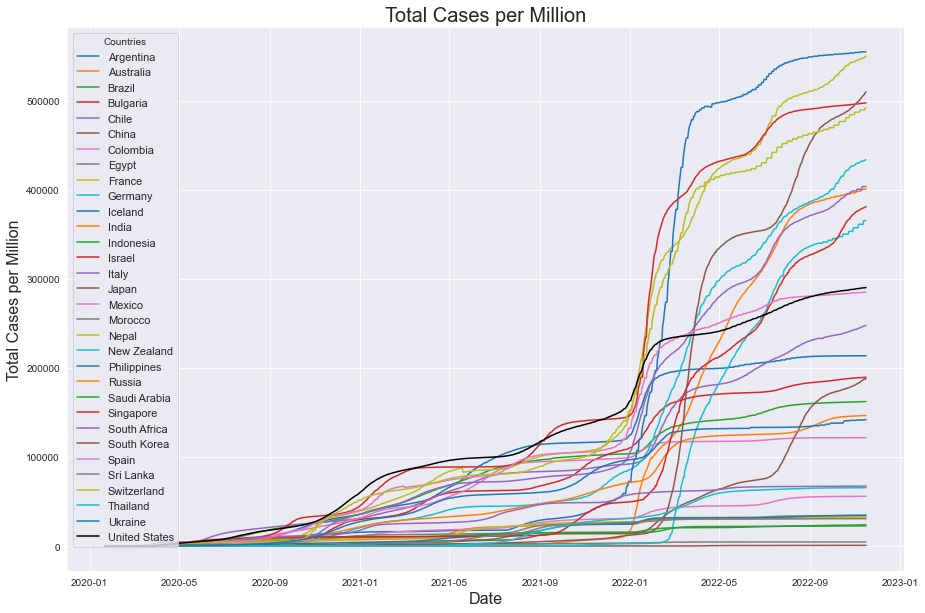

In [7]:
covid_t_q = """SELECT date, location, total_cases_per_million
                            FROM covid_raw;"""
covid_t=pysqldf(covid_t_q)
covid_t['date'] = pd.to_datetime(covid_t['date'], format='%Y-%m-%d')
sns.set_style('darkgrid')
fig, ax3 = plt.subplots(figsize=(15,10))
num_country = covid_t['location'].unique()
palette = dict(zip(num_country, sns.color_palette(n_colors=len(num_country))))
palette.update({"United States":"k"})
ax3=sns.lineplot(x= "date", y = "total_cases_per_million", hue = 'location', data = covid_t,ci=None,palette=palette)
ax3.set_title("Total Cases per Million", fontsize = 20)
ax3.legend(title='Countries', fontsize=11)
ax3.set_xlabel('Date', fontsize=16);
ax3.set_ylabel('Total Cases per Million', fontsize=16);
plt.savefig('tot_case.png',dpi=300)



In [8]:
print(min(covid_t['date']))

2020-01-01 00:00:00


In [9]:
gdp_raw["2021"] = gdp_raw["2021"].astype(float)
gdp_2021 = gdp_raw[["country_code","2021"]].rename(columns={"2021": "gdp_2021"})
gdp_2020 = gdp_raw[["country_code","2020"]].rename(columns={"2020": "gdp_2020"})
gdp_raw

,country_name,country_code,indicator,2018,2019,2020,2021
0,Argentina,ARG,GDP per capita (current US$),11795.159390,10076.355240,8585.694742,10729.232580
1,Australia,AUS,GDP per capita (current US$),57180.779400,54875.285960,51680.316520,59934.129410
2,Brazil,BRA,GDP per capita (current US$),9151.381732,8876.059836,6814.875632,7518.834284
3,Bulgaria,BGR,GDP per capita (current US$),9446.700772,9879.268533,10079.203380,11634.971020
4,Chile,CHL,GDP per capita (current US$),15772.333480,14699.462780,13220.570760,16502.838570
5,China,CHN,GDP per capita (current US$),9905.342004,10143.838200,10408.669760,12556.333120
6,Colombia,COL,GDP per capita (current US$),6729.583332,6418.615783,5312.198556,6131.225922
7,"Egypt, Arab Rep.",EGY,GDP per capita (current US$),2537.125185,3019.092283,3569.206841,3876.359594
8,France,FRA,GDP per capita (current US$),41592.795900,40578.644290,39037.122630,43518.538510
9,Germany,DEU,GDP per capita (current US$),47973.607620,46794.899290,46252.689300,50801.786710


In [10]:
oil_rents_raw
oil_rents_raw["2019"] = pd.to_numeric(oil_rents_raw["2019"])
oil_rents_raw["2020"] = pd.to_numeric(oil_rents_raw["2020"])
oil_rents_raw["2021"] = pd.to_numeric(oil_rents_raw["2021"])
oil_2020 = oil_rents_raw[["country_code","2020"]].rename(columns={"2020": "oil_2020"})
oil_2021 = oil_rents_raw[["country_code","2021"]].rename(columns={"2021": "oil_2021"})
oil_rents_raw

,country_name,country_code,indicator,2018,2019,2020,2021
0,Argentina,ARG,Oil rents (% of GDP),1.394600,1.509673,1.117756,NaN
1,Australia,AUS,Oil rents (% of GDP),0.315018,0.370294,0.253858,NaN
2,Brazil,BRA,Oil rents (% of GDP),2.015980,1.993679,1.849328,NaN
3,Bulgaria,BGR,Oil rents (% of GDP),0.022629,0.019578,0.013006,NaN
4,Chile,CHL,Oil rents (% of GDP),0.015065,0.014457,0.017901,NaN
5,China,CHN,Oil rents (% of GDP),0.433930,0.382789,0.255107,NaN
6,Colombia,COL,Oil rents (% of GDP),3.877650,3.687278,2.611646,NaN
7,"Egypt, Arab Rep.",EGY,Oil rents (% of GDP),5.559640,4.016837,2.116979,NaN
8,France,FRA,Oil rents (% of GDP),0.008376,0.007195,0.004472,NaN
9,Germany,DEU,Oil rents (% of GDP),0.015771,0.013389,0.008837,NaN


In [11]:
inflation_raw["2021"] = pd.to_numeric(inflation_raw["2021"])
inflation_2020 = inflation_raw[["country_code","2020"]].rename(columns={"2020": "inflation_2020"})
inflation_2021 = inflation_raw[["country_code","2021"]].rename(columns={"2021": "inflation_2021"})

In [12]:
tourist_inbound_raw['Country']= tourist_inbound_raw['Country'].str.title()
tourist_inbound_raw=tourist_inbound_raw.replace("Korea, Republic Of","South Korea")
tourist_inbound_raw=tourist_inbound_raw.replace("Russian Federation","Russia")
tourist_inbound_raw=tourist_inbound_raw.replace("United States Of America","United States")

tourist_inbound_raw["2018"] = pd.to_numeric(tourist_inbound_raw["2018"])
tourist_inbound_raw["2019"] = pd.to_numeric(tourist_inbound_raw["2019"])
tourist_inbound_raw["2020"] = pd.to_numeric(tourist_inbound_raw["2020"])
tourist_inbound_raw["2021"] = pd.to_numeric(tourist_inbound_raw["2021"])

tourist_inbound_2020 = tourist_inbound_raw[["Country","2020"]].rename(columns={"2020": "tour_in_2020"})
tourist_inbound_2021 = tourist_inbound_raw[["Country","2021"]].rename(columns={"2021": "tour_in_2021"})

In [13]:
tourist_outbound_raw['Country']= tourist_outbound_raw['Country'].str.title()
tourist_outbound_raw=tourist_outbound_raw.replace("Korea, Republic Of","South Korea")
tourist_outbound_raw=tourist_outbound_raw.replace("Russian Federation","Russia")
tourist_outbound_raw=tourist_outbound_raw.replace("United States Of America","United States")

tourist_outbound_raw["2018"] = pd.to_numeric(tourist_outbound_raw["2018"])
tourist_outbound_raw["2019"] = pd.to_numeric(tourist_outbound_raw["2019"])
tourist_outbound_raw["2020"] = pd.to_numeric(tourist_outbound_raw["2020"])
tourist_outbound_raw["2021"] = pd.to_numeric(tourist_outbound_raw["2021"])

tourist_outbound_2020 = tourist_outbound_raw[["Country","2020"]].rename(columns={"2020": "tour_out_2020"})
tourist_outbound_2021 = tourist_outbound_raw[["Country","2021"]].rename(columns={"2021": "tour_out_2021"})

# 2020 Analysis

In [14]:
# find the 2020_covid
mask = (covid_raw['date'] <= '2020-12-31')
covid_2020=covid_raw.loc[mask]

# average the stringency index
covid_2020_avg_string_q = """SELECT iso_code, avg(stringency_index) as avg_stringency
                            FROM covid_2020
                            group by iso_code;"""
avg_string_2020=pysqldf(covid_2020_avg_string_q)
covid_2020_revised_q = """SELECT * 
                            FROM 
                            (SELECT iso_code, location, date, total_cases_per_million,total_vaccinations, 
                            people_fully_vaccinated
                            FROM covid_2020) as tot
                            LEFT JOIN
                            (SELECT * 
                            FROM avg_string_2020) as avg
                            ON tot.iso_code = avg.iso_code;"""
covid_2020_revised=pysqldf(covid_2020_revised_q)
covid_2020_revised

,iso_code,location,date,total_cases_per_million,total_vaccinations,people_fully_vaccinated,iso_code,avg_stringency
0,ARG,Argentina,2020-01-01,NaN,NaN,NaN,ARG,75.709507
1,ARG,Argentina,2020-01-02,NaN,NaN,NaN,ARG,75.709507
2,ARG,Argentina,2020-01-03,NaN,NaN,NaN,ARG,75.709507
3,ARG,Argentina,2020-01-04,NaN,NaN,NaN,ARG,75.709507
4,ARG,Argentina,2020-01-05,NaN,NaN,NaN,ARG,75.709507
...,...,...,...,...,...,...,...,...
10561,USA,United States,2020-12-27,57061.315,3104465.0,24628.0,USA,59.582551
10562,USA,United States,2020-12-28,57577.981,3700971.0,29049.0,USA,59.582551
10563,USA,United States,2020-12-29,58188.863,4428922.0,34479.0,USA,59.582551
10564,USA,United States,2020-12-30,58835.569,5277326.0,42568.0,USA,59.582551


In [15]:
covid_2020_gdp_q = """SELECT * FROM 
                        (SELECT *
                        FROM covid_2020_revised) as covid
                        LEFT JOIN
                        (SELECT country_code, gdp_2020
                        FROM gdp_2020) as gdp
                        ON covid.iso_code = gdp.country_code;"""
covid_2020_gdp=pysqldf(covid_2020_gdp_q)

# only select the indicators on 2020-12-31
mask = (covid_2020_gdp['date'] == '2020-12-31')
covid_2020_gdp=covid_2020_gdp.loc[mask]
covid_2020_gdp = covid_2020_gdp.rename(columns={"total_cases_per_million": 'Cumu_cases'})

In [16]:
covid_2020_gdp_inf_q = """SELECT * 
                            FROM covid_2020_gdp c
                            JOIN inflation_2020 on c.iso_code = inflation_2020.country_code;"""
covid_2020_gdp_inf=pysqldf(covid_2020_gdp_inf_q)
covid_2020_econ_q = """SELECT * 
                        FROM covid_2020_gdp_inf c
                        JOIN oil_2020 on c.iso_code = oil_2020.country_code;"""
covid_2020_econ=pysqldf(covid_2020_econ_q)

covid_2020_econ_in_q = """SELECT * 
                        FROM covid_2020_econ c
                        JOIN tourist_inbound_2020 on c.location = tourist_inbound_2020.Country;"""
covid_2020_econ_in=pysqldf(covid_2020_econ_in_q)
covid_2020_econ_tour_q ="""SELECT * 
                        FROM covid_2020_econ_in c
                        JOIN tourist_outbound_2020 on c.location = tourist_outbound_2020.Country;"""
covid_2020_econ_tour=pysqldf(covid_2020_econ_tour_q)
covid_2020_econ_tour

,iso_code,location,date,Cumu_cases,total_vaccinations,people_fully_vaccinated,avg_stringency,country_code,gdp_2020,inflation_2020,oil_2020,Country,tour_in_2020,Country,tour_out_2020
0,ARG,Argentina,2020-12-31,35717.478,43398.0,7.0,75.709507,ARG,8585.694742,39.891200,1.117756,Argentina,3096.0,Argentina,4087.0
1,AUS,Australia,2020-12-31,1085.860,NaN,NaN,59.933109,AUS,51680.316520,1.783660,0.253858,Australia,1828.0,Australia,2832.0
2,BRA,Brazil,2020-12-31,35673.712,NaN,NaN,67.230452,BRA,6814.875632,5.140220,1.849328,Brazil,NaN,Brazil,NaN
3,BGR,Bulgaria,2020-12-31,29824.144,NaN,NaN,49.180635,BGR,10079.203380,4.202620,0.013006,Bulgaria,4973.0,Bulgaria,3973.0
4,CHL,Chile,2020-12-31,31064.130,NaN,NaN,73.281502,CHL,13220.570760,8.817320,0.017901,Chile,1310.5,Chile,1161.6
5,CHN,China,2020-12-31,65.699,4500000.0,NaN,72.179565,CHN,10408.669760,0.491448,0.255107,China,30402.0,China,NaN
6,COL,Colombia,2020-12-31,31668.545,NaN,NaN,75.460465,COL,5312.198556,1.356490,2.611646,Colombia,1396.0,Colombia,NaN
7,EGY,Egypt,2020-12-31,1243.913,NaN,NaN,61.086584,EGY,3569.206841,6.221220,2.116979,Egypt,3677.0,Egypt,NaN
8,FRA,France,2020-12-31,39235.486,2582.0,2.0,57.917551,FRA,39037.122630,2.524650,0.004472,France,117109.0,France,21287.0
9,DEU,Germany,2020-12-31,20627.807,206488.0,NaN,55.725882,DEU,46252.689300,1.596820,0.008837,Germany,NaN,Germany,NaN


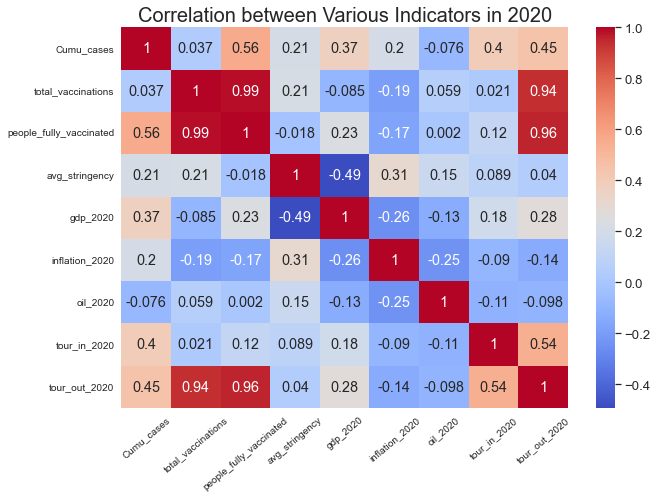

In [17]:
# Q3. Discover the impact of COVID-19 pandemic on the economy by calculating 
# the correlation between GDP and COVID-19 case number.
fig, ax1 = plt.subplots(figsize=(10,7))
sns.set(font_scale = 1.2)
ax1=sns.heatmap(covid_2020_econ_tour.corr(), annot = True,cmap='coolwarm')
ax1.set_title("Correlation between Various Indicators in 2020", fontsize = 20)

plt.xticks(rotation=40)

plt.savefig('covid_gdp_corr_2020.png',dpi=300)
# covid_2020_gdp.corr()

In [18]:
# drop the total_vaccinations because it has close to perfect correlation with people_flly_vaccinated
# https://www.datarobot.com/blog/multiple-regression-using-statsmodels/
X_2020 = covid_2020_econ_tour[['avg_stringency','gdp_2020','inflation_2020']]
X_2020 = sm.add_constant(X_2020) 
y_2020 = covid_2020_econ_tour['Cumu_cases']
est_2020 = sm.OLS(y_2020, X_2020).fit() 
est_2020.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cumu_cases   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     5.778
Date:                Tue, 20 Dec 2022   Prob (F-statistic):            0.00331
Time:                        01:20:53   Log-Likelihood:                -349.37
No. Observations:                  32   AIC:                             706.7
Df Residuals:                      28   BIC:                             712.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.003e+04   1.89e+04     -2.117      0.043   -7.88e+04   -1289.303
avg_stringency   763.2698    288.161      2.649      0.013     172.998    1353.542
gdp_2020           0.4852      0.128      3.788      0.001       0.223       0.748
inflation_2020   524.8950    362.495      1.448      0.159    -217.642    1267.432
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.540
Skew:                           0.037   Prob(JB):                        0.763
Kurtosis:                       2.368   Cond. No.                     2.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
covid_2020_econ_tour

,iso_code,location,date,Cumu_cases,total_vaccinations,people_fully_vaccinated,avg_stringency,country_code,gdp_2020,inflation_2020,oil_2020,Country,tour_in_2020,Country,tour_out_2020
0,ARG,Argentina,2020-12-31,35717.478,43398.0,7.0,75.709507,ARG,8585.694742,39.891200,1.117756,Argentina,3096.0,Argentina,4087.0
1,AUS,Australia,2020-12-31,1085.860,NaN,NaN,59.933109,AUS,51680.316520,1.783660,0.253858,Australia,1828.0,Australia,2832.0
2,BRA,Brazil,2020-12-31,35673.712,NaN,NaN,67.230452,BRA,6814.875632,5.140220,1.849328,Brazil,NaN,Brazil,NaN
3,BGR,Bulgaria,2020-12-31,29824.144,NaN,NaN,49.180635,BGR,10079.203380,4.202620,0.013006,Bulgaria,4973.0,Bulgaria,3973.0
4,CHL,Chile,2020-12-31,31064.130,NaN,NaN,73.281502,CHL,13220.570760,8.817320,0.017901,Chile,1310.5,Chile,1161.6
5,CHN,China,2020-12-31,65.699,4500000.0,NaN,72.179565,CHN,10408.669760,0.491448,0.255107,China,30402.0,China,NaN
6,COL,Colombia,2020-12-31,31668.545,NaN,NaN,75.460465,COL,5312.198556,1.356490,2.611646,Colombia,1396.0,Colombia,NaN
7,EGY,Egypt,2020-12-31,1243.913,NaN,NaN,61.086584,EGY,3569.206841,6.221220,2.116979,Egypt,3677.0,Egypt,NaN
8,FRA,France,2020-12-31,39235.486,2582.0,2.0,57.917551,FRA,39037.122630,2.524650,0.004472,France,117109.0,France,21287.0
9,DEU,Germany,2020-12-31,20627.807,206488.0,NaN,55.725882,DEU,46252.689300,1.596820,0.008837,Germany,NaN,Germany,NaN


In [20]:
covid_2020_econ_tour_reg = covid_2020_econ_tour[['Cumu_cases','avg_stringency','gdp_2020','inflation_2020','oil_2020','tour_in_2020','tour_out_2020']]
covid_2020_econ_tour_reg = covid_2020_econ_tour_reg.dropna()
X_2020_tour = covid_2020_econ_tour_reg[['avg_stringency','gdp_2020','inflation_2020','oil_2020','tour_in_2020','tour_out_2020']]
X_2020_tour = sm.add_constant(X_2020_tour) 
y_2020_tour = covid_2020_econ_tour_reg['Cumu_cases']
est_2020_tour = sm.OLS(y_2020_tour, X_2020_tour).fit() 
est_2020_tour.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cumu_cases   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1.205
Date:                Tue, 20 Dec 2022   Prob (F-statistic):              0.402
Time:                        01:20:53   Log-Likelihood:                -151.15
No. Observations:                  14   AIC:                             316.3
Df Residuals:                       7   BIC:                             320.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.334e+04   3.19e+04     -0.418      0.689   -8.89e+04    6.22e+04
avg_stringency   434.1030    532.088      0.816      0.441    -824.086    1692.292
gdp_2020           0.1158      0.300      0.385      0.711      -0.595       0.826
inflation_2020   393.0472    552.662      0.711      0.500    -913.791    1699.886
oil_2020        -463.9086   1161.369     -0.399      0.701   -3210.110    2282.293
tour_in_2020       0.1111      0.176      0.631      0.548      -0.305       0.528
tour_out_2020      0.4001      0.355      1.126      0.297      -0.440       1.240
==============================================================================
Omnibus:                        0.963   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.739
Skew:                          -0.501   Prob(JB):                        0.691
Kurtosis:                       2.488   Cond. No.                     3.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
covid_2020_econ_tour

,iso_code,location,date,Cumu_cases,total_vaccinations,people_fully_vaccinated,avg_stringency,country_code,gdp_2020,inflation_2020,oil_2020,Country,tour_in_2020,Country,tour_out_2020
0,ARG,Argentina,2020-12-31,35717.478,43398.0,7.0,75.709507,ARG,8585.694742,39.891200,1.117756,Argentina,3096.0,Argentina,4087.0
1,AUS,Australia,2020-12-31,1085.860,NaN,NaN,59.933109,AUS,51680.316520,1.783660,0.253858,Australia,1828.0,Australia,2832.0
2,BRA,Brazil,2020-12-31,35673.712,NaN,NaN,67.230452,BRA,6814.875632,5.140220,1.849328,Brazil,NaN,Brazil,NaN
3,BGR,Bulgaria,2020-12-31,29824.144,NaN,NaN,49.180635,BGR,10079.203380,4.202620,0.013006,Bulgaria,4973.0,Bulgaria,3973.0
4,CHL,Chile,2020-12-31,31064.130,NaN,NaN,73.281502,CHL,13220.570760,8.817320,0.017901,Chile,1310.5,Chile,1161.6
5,CHN,China,2020-12-31,65.699,4500000.0,NaN,72.179565,CHN,10408.669760,0.491448,0.255107,China,30402.0,China,NaN
6,COL,Colombia,2020-12-31,31668.545,NaN,NaN,75.460465,COL,5312.198556,1.356490,2.611646,Colombia,1396.0,Colombia,NaN
7,EGY,Egypt,2020-12-31,1243.913,NaN,NaN,61.086584,EGY,3569.206841,6.221220,2.116979,Egypt,3677.0,Egypt,NaN
8,FRA,France,2020-12-31,39235.486,2582.0,2.0,57.917551,FRA,39037.122630,2.524650,0.004472,France,117109.0,France,21287.0
9,DEU,Germany,2020-12-31,20627.807,206488.0,NaN,55.725882,DEU,46252.689300,1.596820,0.008837,Germany,NaN,Germany,NaN


# 2021

In [22]:
mask = ('2020-12-31'<covid_raw['date'])&(covid_raw['date'] <= '2021-12-31')
covid_2021=covid_raw.loc[mask]
covid_2021_avg_string_q = """SELECT iso_code, avg(stringency_index) as avg_stringency
                            FROM covid_2021
                            group by iso_code;"""
avg_string_2021=pysqldf(covid_2021_avg_string_q)
print(avg_string_2021)

covid_2021_end_q = """select twenty.iso_code, twenty.location,
                    2021_cum_case_per_million -2020_cum_case_per_million as Cumu_cases, 
                    2021_tot_vacc-2020_tot_vacc as total_vaccinations,
                    2021_tot_vacced -2020_tot_vacced as people_fully_vaccinated 
                    from 
                        (SELECT iso_code, date ,location, total_cases_per_million as 2020_cum_case_per_million, 
                        total_vaccinations as 2020_tot_vacc, people_fully_vaccinated as 2020_tot_vacced 
                        FROM database_project.covid where date = '12/31/20') as twenty, 
                        
                        (SELECT iso_code, location,  total_cases_per_million as 2021_cum_case_per_million, 
                        total_vaccinations as 2021_tot_vacc, people_fully_vaccinated as 2021_tot_vacced 
                        FROM database_project.covid where date = '12/31/21') as twenty_one 
                    where twenty.iso_code = twenty_one.iso_code;"""
covid_2021_end = pd.read_sql(covid_2021_end_q,cnx)
covid_2021_end


   iso_code  avg_stringency
0       ARG       67.051973
1       AUS       61.317945
2       BGR       48.395589
3       BRA       59.724493
4       CHE       48.587863
5       CHL       66.344521
6       CHN       71.183534
7       COL       61.009918
8       DEU       61.778932
9       EGY       47.906904
10      ESP       55.437753
11      FRA       52.683616
12      IDN       68.575205
13      IND       67.314411
14      ISL       37.797918
15      ISR       51.761671
16      ITA       63.766082
17      JPN       48.847836
18      KOR       51.327781
19      LKA       72.293068
20      MAR       67.509753
21      MEX       49.121370
22      NPL       54.696521
23      NZL       44.685589
24      PHL       72.812822
25      RUS       46.464877
26      SAU       53.476438
27      SGP       48.945753
28      THA       55.542055
29      UKR       56.416219
30      USA       56.512904
31      ZAF       52.864164


,iso_code,location,Cumu_cases,total_vaccinations,people_fully_vaccinated
0,ARG,Argentina,88527.034,7.822786e+07,33471392.0
1,AUS,Australia,15168.460,0.000000e+00,0.0
2,BRA,Brazil,67858.294,3.312739e+08,143436012.0
3,BGR,Bulgaria,80337.012,3.700660e+06,1914910.0
4,CHL,Chile,61086.366,4.431329e+07,16547767.0
5,CHN,China,15.070,2.830832e+09,0.0
6,COL,Colombia,67753.848,6.469049e+07,28323837.0
7,EGY,Egypt,2230.046,0.000000e+00,0.0
8,FRA,France,108494.610,1.242204e+08,49635854.0
9,DEU,Germany,65139.684,1.536874e+08,59129366.0


In [23]:

covid_2021_revised_q = """SELECT * 
                            FROM 
                            (SELECT *
                            FROM covid_2021_end) as tot
                            LEFT JOIN
                            (SELECT * 
                            FROM avg_string_2021) as avg
                            ON tot.iso_code = avg.iso_code;"""
covid_2021_revised=pysqldf(covid_2021_revised_q)
print(covid_2021_revised)


covid_2021_gdp_q = """SELECT * FROM 
                        (SELECT *
                        FROM covid_2021_revised) as covid
                        LEFT JOIN
                        (SELECT country_code, gdp_2021
                        FROM gdp_2021) as gdp
                        ON covid.iso_code = gdp.country_code;"""
covid_2021_gdp=pysqldf(covid_2021_gdp_q)

covid_2021_gdp = covid_2021_gdp.rename(columns={"total_cases_per_million": 'Cumu_cases'})



covid_2021_gdp_inf_q = """SELECT * 
                            FROM covid_2021_gdp c
                            JOIN inflation_2021 on c.iso_code = inflation_2021.country_code;"""
covid_2021_gdp_inf=pysqldf(covid_2021_gdp_inf_q)
covid_2021_econ_q = """SELECT * 
                        FROM covid_2021_gdp_inf c
                        JOIN oil_2021 on c.iso_code = oil_2021.country_code;"""
covid_2021_econ=pysqldf(covid_2021_econ_q)

covid_2021_econ_in_q = """SELECT * 
                        FROM covid_2021_econ c
                        JOIN tourist_inbound_2021 on c.location = tourist_inbound_2021.Country;"""
covid_2021_econ_in=pysqldf(covid_2021_econ_in_q)
covid_2021_econ_tour_q ="""SELECT * 
                        FROM covid_2021_econ_in c
                        JOIN tourist_outbound_2021 on c.location = tourist_outbound_2021.Country;"""
covid_2021_econ_tour=pysqldf(covid_2021_econ_tour_q)
covid_2021_econ_tour

   iso_code       location  Cumu_cases  total_vaccinations  \
0       ARG      Argentina   88527.034        7.822786e+07   
1       AUS      Australia   15168.460        0.000000e+00   
2       BRA         Brazil   67858.294        3.312739e+08   
3       BGR       Bulgaria   80337.012        3.700660e+06   
4       CHL          Chile   61086.366        4.431329e+07   
5       CHN          China      15.070        2.830832e+09   
6       COL       Colombia   67753.848        6.469049e+07   
7       EGY          Egypt    2230.046        0.000000e+00   
8       FRA         France  108494.610        1.242204e+08   
9       DEU        Germany   65139.684        1.536874e+08   
10      ISL        Iceland   57132.820        0.000000e+00   
11      IND          India   17340.768        1.448865e+09   
12      IDN      Indonesia   12774.972        2.747492e+08   
13      ISR         Israel  101668.959        1.578959e+07   
14      ITA          Italy   68067.227        1.113178e+08   
15      

,iso_code,location,Cumu_cases,total_vaccinations,people_fully_vaccinated,avg_stringency,country_code,gdp_2021,inflation_2021,oil_2021,Country,tour_in_2021,Country,tour_out_2021
0,ARG,Argentina,88527.034,7.822786e+07,33471392.0,67.051973,ARG,10729.232580,54.072764,None,Argentina,460.0,Argentina,1074.0
1,AUS,Australia,15168.460,0.000000e+00,0.0,61.317945,AUS,59934.129410,2.831867,None,Australia,246.0,Australia,301.0
2,BRA,Brazil,67858.294,3.312739e+08,143436012.0,59.724493,BRA,7518.834284,11.096370,None,Brazil,NaN,Brazil,NaN
3,BGR,Bulgaria,80337.012,3.700660e+06,1914910.0,48.395589,BGR,11634.971020,6.227302,None,Bulgaria,7188.0,Bulgaria,5182.0
4,CHL,Chile,61086.366,4.431329e+07,16547767.0,66.344521,CHL,16502.838570,7.559883,None,Chile,NaN,Chile,NaN
5,CHN,China,15.070,2.830832e+09,0.0,71.183534,CHN,12556.333120,4.371787,None,China,NaN,China,NaN
6,COL,Colombia,67753.848,6.469049e+07,28323837.0,61.009918,COL,6131.225922,6.563723,None,Colombia,2174.0,Colombia,NaN
7,EGY,Egypt,2230.046,0.000000e+00,0.0,47.906904,EGY,3876.359594,4.813716,None,Egypt,NaN,Egypt,NaN
8,FRA,France,108494.610,1.242204e+08,49635854.0,52.683616,FRA,43518.538510,0.827969,None,France,NaN,France,22007.0
9,DEU,Germany,65139.684,1.536874e+08,59129366.0,61.778932,DEU,50801.786710,3.049085,None,Germany,NaN,Germany,NaN


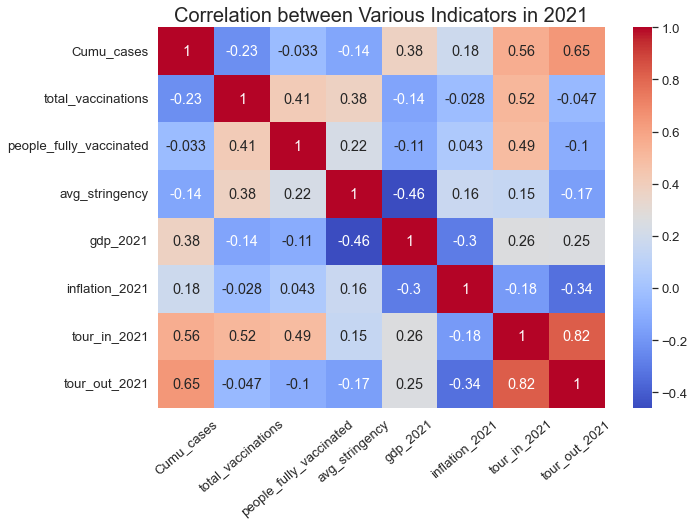

In [24]:
fig, ax1 = plt.subplots(figsize=(10,7))
sns.set(font_scale = 1.2)
ax1=sns.heatmap(covid_2021_econ_tour.corr(), annot = True,cmap='coolwarm')
ax1.set_title("Correlation between Various Indicators in 2021", fontsize = 20)

plt.xticks(rotation=40)

plt.savefig('covid_gdp_corr.png',dpi=300)

In [25]:
covid_2021_econ_tour

,iso_code,location,Cumu_cases,total_vaccinations,people_fully_vaccinated,avg_stringency,country_code,gdp_2021,inflation_2021,oil_2021,Country,tour_in_2021,Country,tour_out_2021
0,ARG,Argentina,88527.034,7.822786e+07,33471392.0,67.051973,ARG,10729.232580,54.072764,None,Argentina,460.0,Argentina,1074.0
1,AUS,Australia,15168.460,0.000000e+00,0.0,61.317945,AUS,59934.129410,2.831867,None,Australia,246.0,Australia,301.0
2,BRA,Brazil,67858.294,3.312739e+08,143436012.0,59.724493,BRA,7518.834284,11.096370,None,Brazil,NaN,Brazil,NaN
3,BGR,Bulgaria,80337.012,3.700660e+06,1914910.0,48.395589,BGR,11634.971020,6.227302,None,Bulgaria,7188.0,Bulgaria,5182.0
4,CHL,Chile,61086.366,4.431329e+07,16547767.0,66.344521,CHL,16502.838570,7.559883,None,Chile,NaN,Chile,NaN
5,CHN,China,15.070,2.830832e+09,0.0,71.183534,CHN,12556.333120,4.371787,None,China,NaN,China,NaN
6,COL,Colombia,67753.848,6.469049e+07,28323837.0,61.009918,COL,6131.225922,6.563723,None,Colombia,2174.0,Colombia,NaN
7,EGY,Egypt,2230.046,0.000000e+00,0.0,47.906904,EGY,3876.359594,4.813716,None,Egypt,NaN,Egypt,NaN
8,FRA,France,108494.610,1.242204e+08,49635854.0,52.683616,FRA,43518.538510,0.827969,None,France,NaN,France,22007.0
9,DEU,Germany,65139.684,1.536874e+08,59129366.0,61.778932,DEU,50801.786710,3.049085,None,Germany,NaN,Germany,NaN


In [26]:
print(covid_2021_econ_tour['tour_in_2021'].isna().sum())
print(covid_2021_econ_tour['tour_out_2021'].isna().sum())

18
24


In [27]:
covid_2021_econ_tour_reg = covid_2021_econ_tour[['Cumu_cases','total_vaccinations',
                                                 'people_fully_vaccinated','avg_stringency','gdp_2021',
                                                 'inflation_2021']]
covid_2021_econ_tour_reg
X_2021_tour = covid_2021_econ_tour_reg[['total_vaccinations','people_fully_vaccinated','avg_stringency',
                                        'gdp_2021','inflation_2021']]
X_2021_tour = sm.add_constant(X_2021_tour) 
y_2021_tour = covid_2021_econ_tour_reg['Cumu_cases']
est_2021_tour = sm.OLS(y_2021_tour, X_2021_tour).fit() 
est_2021_tour.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cumu_cases   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1.974
Date:                Tue, 20 Dec 2022   Prob (F-statistic):              0.116
Time:                        01:20:54   Log-Likelihood:                -374.45
No. Observations:                  32   AIC:                             760.9
Df Residuals:                      26   BIC:                             769.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1776.5067   4.76e+04     -0.037      0.970   -9.95e+04     9.6e+04
total_vaccinations       -1.44e-05   1.24e-05     -1.161      0.256   -3.99e-05    1.11e-05
people_fully_vaccinated  2.379e-05   5.74e-05      0.414      0.682   -9.42e-05       0.000
avg_stringency            423.5916    783.410      0.541      0.593   -1186.731    2033.914
gdp_2021                    0.6660      0.262      2.538      0.017       0.127       1.205
inflation_2021           1044.9364    613.216      1.704      0.100    -215.547    2305.420
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.849
Skew:                           0.132   Prob(JB):                        0.654
Kurtosis:                       2.247   Cond. No.                     4.83e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2020 Time Series

In [28]:
# https://builtin.com/data-science/time-series-python
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [29]:
covid_2020

,iso_code,location,date,total_cases_per_million,stringency_index,total_vaccinations,people_fully_vaccinated
0,ARG,Argentina,2020-01-01,NaN,NaN,NaN,NaN
1,ARG,Argentina,2020-01-02,NaN,NaN,NaN,NaN
2,ARG,Argentina,2020-01-03,NaN,NaN,NaN,NaN
3,ARG,Argentina,2020-01-04,NaN,NaN,NaN,NaN
4,ARG,Argentina,2020-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31796,USA,United States,2020-12-27,57061.315,71.76,3104465.0,24628.0
31797,USA,United States,2020-12-28,57577.981,71.76,3700971.0,29049.0
31798,USA,United States,2020-12-29,58188.863,71.76,4428922.0,34479.0
31799,USA,United States,2020-12-30,58835.569,71.76,5277326.0,42568.0


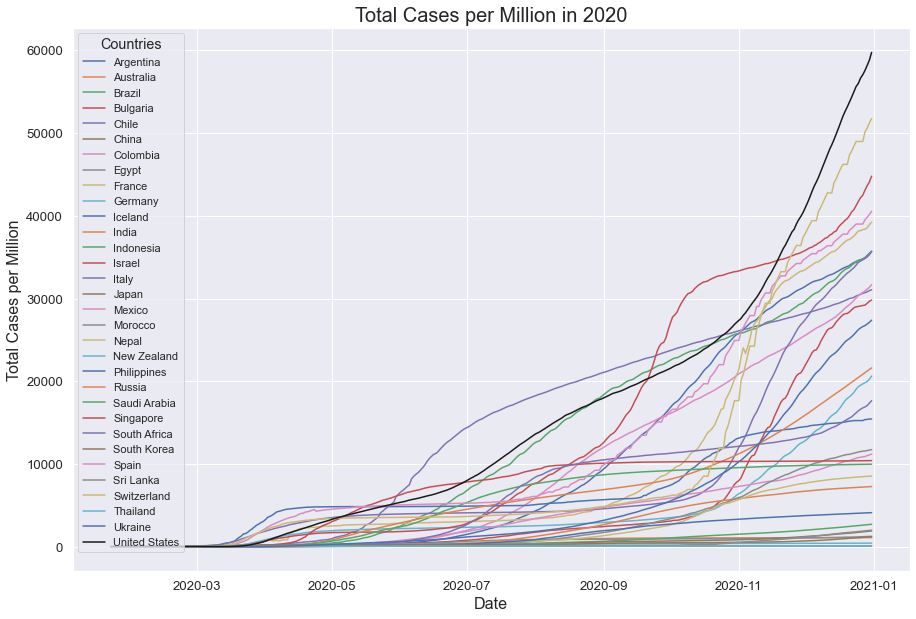

In [30]:
covid_2020_t_q = """SELECT date, location, total_cases_per_million
                            FROM covid_2020 c"""
covid_2020_t=pysqldf(covid_2020_t_q)

covid_2020_t['date'] = pd.to_datetime(covid_2020_t['date'], format='%Y-%m-%d')

fig, ax3 = plt.subplots(figsize=(15,10))
num_country = covid_2020_t['location'].unique()
palette = dict(zip(num_country, sns.color_palette(n_colors=len(num_country))))
palette.update({"United States":"k"})
ax3=sns.lineplot(x= "date", y = "total_cases_per_million", hue = 'location', data = covid_2020_t,ci=None,palette=palette)
ax3.set_title("Total Cases per Million in 2020", fontsize = 20)
ax3.legend(title='Countries', fontsize=11)
ax3.set_xlabel('Date', fontsize=16);
ax3.set_ylabel('Total Cases per Million', fontsize=16);
plt.savefig('tot_case_2020.png',dpi=300)


# covid_2020_us_t

In [31]:
covid_2020_us_t = covid_2020_t[covid_2020_t['location'] == 'United States']
covid_2020_us_t.index = covid_2020_us_t['date']
covid_2020_us_t = covid_2020_us_t['total_cases_per_million']
covid_2020_us_t

date
2020-01-22        0.003
2020-01-23        0.003
2020-01-24        0.006
2020-01-25        0.006
2020-01-26        0.015
                ...    
2020-12-27    57061.315
2020-12-28    57577.981
2020-12-29    58188.863
2020-12-30    58835.569
2020-12-31    59763.116
Name: total_cases_per_million, Length: 345, dtype: float64

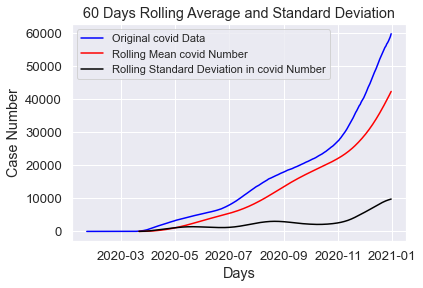

In [32]:
rolling_mean = covid_2020_us_t.rolling(60).mean()
rolling_std = covid_2020_us_t.rolling(60).std()
plt.plot(covid_2020_us_t, color="blue",label="Original covid Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean covid Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in covid Number")
plt.title("60 Days Rolling Average and Standard Deviation")
plt.legend(fontsize=11)
plt.xlabel('Days')
plt.ylabel('Case Number')
plt.savefig('rolling.png')

## I want to see if the covid-19 data is (weakly) stationary, meaning that whether 
1. The data has a mean function that is independent of time 
2. The data has a contastant variance function
3. The data has autocovariance function that is independent of time 

If all three are satisfied, then the data is stationary.
However, I suspect that the data is not stationary because the moving average is increasing as the time increase. 


# Dickey-Fuller test for stationary
-- Null Hypothesis: The data is not stationary

-- Alternative Hypothesis: The data is stationary

In [33]:

adft = adfuller(covid_2020_us_t,autolag="AIC")

In [34]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], 
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                            "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    2.234327              Test Statistics
1    0.998910                      p-value
2   17.000000             No. of lags used
3  327.000000  Number of observations used
4   -3.450507          critical value (1%)
5   -2.870420          critical value (5%)
6   -2.571501         critical value (10%)


Since the p-value is bigger than 0.05. We fail to reject the null hypothesis. We thus determine that the data is not stationary.

Since the data is not sationary, we cannot use any ARMA(p, q) models. We need to use ARIMA(p,d,q) model


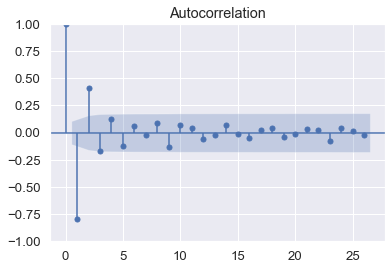

In [35]:
# Original Series
covid_diff=covid_2020_us_t.diff().diff().diff().diff().diff().dropna()
plot_acf(covid_diff)

plt.show()
# After differencing 5 times, the data have geometric decay, indicating the data becomes stationary
# in addition, the p seems to be 3

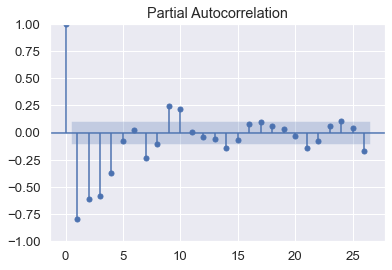

In [36]:
plot_pacf(covid_diff)

plt.show()
# q seems to be 5

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
arima_model = ARIMA(covid_2020_us_t, order=(3,5,5))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())
#https://analyzingalpha.com/interpret-arima-results

                                  SARIMAX Results                                  
Dep. Variable:     total_cases_per_million   No. Observations:                  345
Model:                      ARIMA(3, 5, 5)   Log Likelihood               -1776.743
Date:                     Tue, 20 Dec 2022   AIC                           3571.487
Time:                             01:20:56   BIC                           3605.947
Sample:                         01-22-2020   HQIC                          3585.218
                              - 12-31-2020                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.3698      0.904     -2.622      0.009      -4.141      -0.598
ar.L2         -1.7445      1.274     -1.369      0.171      -4.241       0.752
ar.L3       

In [39]:
covid_2021_t_test_q = """SELECT date, total_cases_per_million
                        FROM covid_2021
                        WHERE iso_code = 'USA';"""
covid_2021_t_test=pysqldf(covid_2021_t_test_q)
covid_2021_t_test['date']=pd.to_datetime(covid_2021_t_test['date'], infer_datetime_format=True)
covid_2021_t_test.index =covid_2021_t_test['date']
date_mask = ('2021-1-1'<=covid_2021_t_test['date'])&(covid_2021_t_test['date'] <= '2021-3-1')
covid_2021_t_test=covid_2021_t_test.loc[date_mask]
covid_2021_t_test=covid_2021_t_test['total_cases_per_million']
len(covid_2021_t_test)

60

In [40]:
covid_2021_t_test

date
2021-01-01    60288.015
2021-01-02    61093.384
2021-01-03    61693.946
2021-01-04    62246.543
2021-01-05    62932.570
2021-01-06    63700.775
2021-01-07    64543.289
2021-01-08    65438.909
2021-01-09    66217.368
2021-01-10    66837.898
2021-01-11    67442.921
2021-01-12    68099.943
2021-01-13    68776.041
2021-01-14    69470.564
2021-01-15    70192.971
2021-01-16    70834.169
2021-01-17    71354.832
2021-01-18    71772.436
2021-01-19    72236.508
2021-01-20    72791.293
2021-01-21    73359.055
2021-01-22    73924.989
2021-01-23    74448.931
2021-01-24    74862.129
2021-01-25    75246.501
2021-01-26    75693.680
2021-01-27    76152.470
2021-01-28    76645.269
2021-01-29    77128.027
2021-01-30    77572.521
2021-01-31    77905.233
2021-02-01    78277.384
2021-02-02    78624.631
2021-02-03    78992.457
2021-02-04    79360.937
2021-02-05    79746.482
2021-02-06    80090.096
2021-02-07    80353.672
2021-02-08    80599.623
2021-02-09    80882.523
2021-02-10    81165.428
2021-02-11 

In [41]:

forcast_result= arima_model_fit.forecast(60, alpha=0.05)

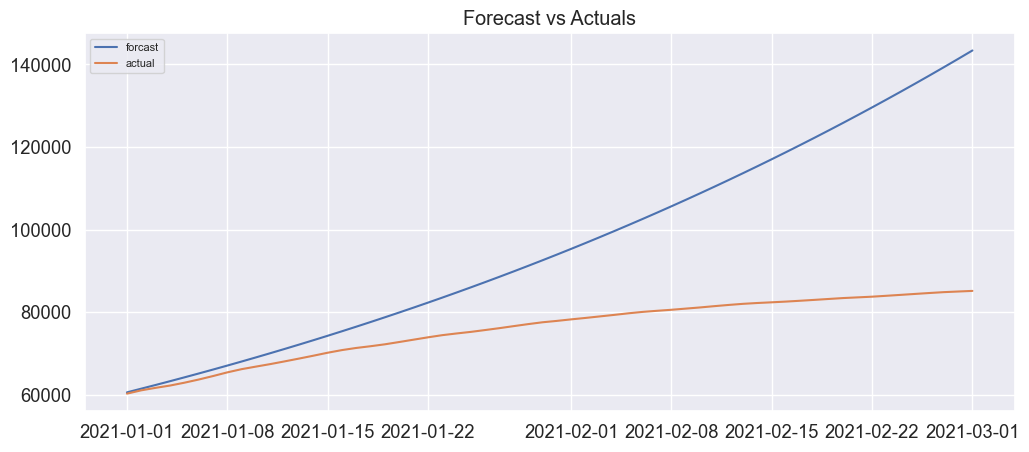

In [42]:
fc_series = pd.Series(forcast_result, index=forcast_result.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(fc_series, label='forcast')
plt.plot(covid_2021_t_test, label='actual')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [43]:
# tourist_expenditure_raw["2021"] = pd.to_numeric(tourist_expenditure_raw["2021"])
# tourist_expenditure = tourist_expenditure_raw.copy()
# tourist_expenditure['country'] = tourist_expenditure['country'].str.title()
# tourist_expenditure=tourist_expenditure.replace("Korea, Republic Of","South Korea")
# tourist_expenditure=tourist_expenditure.replace("Russian Federation","Russia")
# tourist_expenditure=tourist_expenditure.replace("United States Of America","United States")
# tourist_expenditure